## EDA - Exploratory Data Analysis for a Portuguese Election Dataset

Esse notebook tem o objetivo de realizar a exploração dos dados da eleição portuguesa de 2019 para gerar embasamento para um projeto de previsibilidade de resultados.

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

In [35]:
catalog.list()

['raw_election_dataset',
 'pp_election_dataset',
 'encoded_election_dateset',
 'label_encoder_party',
 'label_encoder_territory',
 'parameters']

In [41]:
df = catalog.load('raw_election_dataset')
df.head()

2022-06-30 06:56:15,841 - kedro.io.data_catalog - INFO - Loading data from `raw_election_dataset` (CSVDataSet)...


,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,...,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
0,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,PS,0,38.29,40.22,147993,94,106
1,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,PPD/PSD,0,33.28,34.95,128624,81,77
2,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,B.E.,0,6.81,7.15,26307,16,19
3,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,CDS-PP,0,4.90,5.14,18923,12,5
4,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,PCP-PEV,0,4.59,4.83,17757,11,12


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21643 entries, 0 to 21642
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   TimeElapsed               21643 non-null  int64  
 1   time                      21643 non-null  object 
 2   territoryName             21643 non-null  object 
 3   totalMandates             21643 non-null  int64  
 4   availableMandates         21643 non-null  int64  
 5   numParishes               21643 non-null  int64  
 6   numParishesApproved       21643 non-null  int64  
 7   blankVotes                21643 non-null  int64  
 8   blankVotesPercentage      21643 non-null  float64
 9   nullVotes                 21643 non-null  int64  
 10  nullVotesPercentage       21643 non-null  float64
 11  votersPercentage          21643 non-null  float64
 12  subscribedVoters          21643 non-null  int64  
 13  totalVoters               21643 non-null  int64  
 14  pre.bl

É possível perceber a partir dos dados acima, que não existem entradas <b>NULL</b> em nenhuma das tabelas. Assim, não será necessário realizar nenhum tratamento. Ao total, existem 27 colunas no DataFrame, em que 

In [5]:
df.describe()

,TimeElapsed,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,...,pre.nullVotesPercentage,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
count,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,...,21643.000000,21643.000000,2.164300e+04,2.164300e+04,21643.000000,21643.000000,21643.000000,2.164300e+04,21643.000000,21643.000000
mean,133.146052,11.544795,11.499284,309.956013,261.090237,8875.066673,2.621629,6148.068752,1.961471,51.983722,...,1.777442,54.549372,6.378503e+05,3.594932e+05,0.565495,4.968484,5.207232,1.585209e+04,1.126138,1.126138
std,77.651193,31.314567,31.738783,659.055911,583.377428,21484.874088,0.795289,14735.469269,0.375250,4.854380,...,0.388798,4.964948,1.544418e+06,8.763729e+05,4.421804,10.379967,10.881108,9.310605e+04,6.293552,6.872644
min,0.000000,0.000000,0.000000,54.000000,3.000000,19.000000,0.530000,39.000000,1.340000,35.980000,...,1.140000,40.870000,6.383000e+03,3.215000e+03,0.000000,0.020000,0.020000,1.000000e+00,0.000000,0.000000
25%,65.000000,1.000000,0.000000,75.000000,67.000000,1188.000000,2.230000,1094.000000,1.720000,50.290000,...,1.520000,51.210000,1.289260e+05,6.964400e+04,0.000000,0.220000,0.230000,2.360000e+02,0.000000,0.000000
50%,135.000000,4.000000,3.000000,147.000000,120.000000,2998.000000,2.640000,2232.000000,1.870000,53.130000,...,1.690000,56.260000,2.284970e+05,1.102730e+05,0.000000,0.620000,0.650000,7.900000e+02,0.000000,0.000000
75%,200.000000,9.000000,9.000000,242.000000,208.000000,6889.000000,2.980000,4121.000000,2.230000,54.550000,...,1.970000,58.220000,3.933140e+05,2.276200e+05,0.000000,3.010000,3.160000,4.510000e+03,0.000000,0.000000
max,265.000000,226.000000,226.000000,3092.000000,3092.000000,129599.000000,5.460000,88539.000000,3.350000,59.870000,...,3.120000,62.580000,9.439701e+06,5.380451e+06,106.000000,49.110000,51.420000,1.866407e+06,94.000000,106.000000


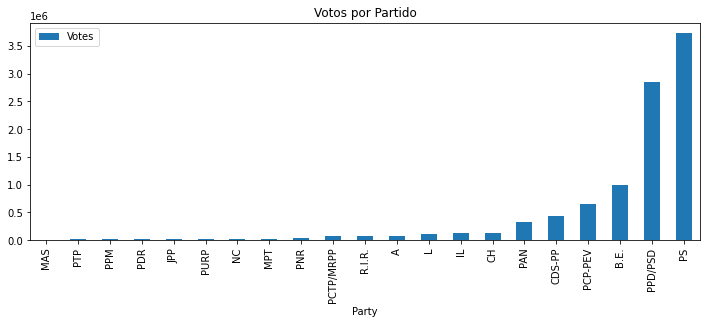

In [43]:
plot_df = df[df['TimeElapsed'] == 265][['Party', 'Votes']].groupby('Party').sum().sort_values('Votes')
plot_df[['Votes']].plot(kind='bar', figsize=(12,4))
plt.title('Votos por Partido')
plt.show()

No gráfico acima, é possível observar que existe uma grande concentração de votos em poucos partidos, principalmente PS e a coligação PPD/PSD.

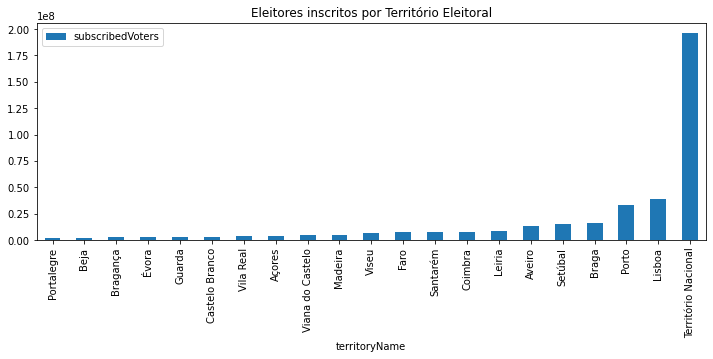

In [44]:
plot_df = df[df['TimeElapsed'] == 265][['territoryName', 'subscribedVoters']].groupby('territoryName').sum().sort_values('subscribedVoters')
plot_df[['subscribedVoters']].plot(kind='bar', figsize=(12,4))
plt.title('Eleitores inscritos por Território Eleitoral')
plt.show()

É possível perceber que a distribuição do número de eleitores também varia bastante conforme o tamanho das cidades. Cidades grandes como Lisboa e Porto possuem grande parte dos eleitores. Ainda é possível perceber que a eleição nacional ocorre no mesmo período, com alto número de eleitores.

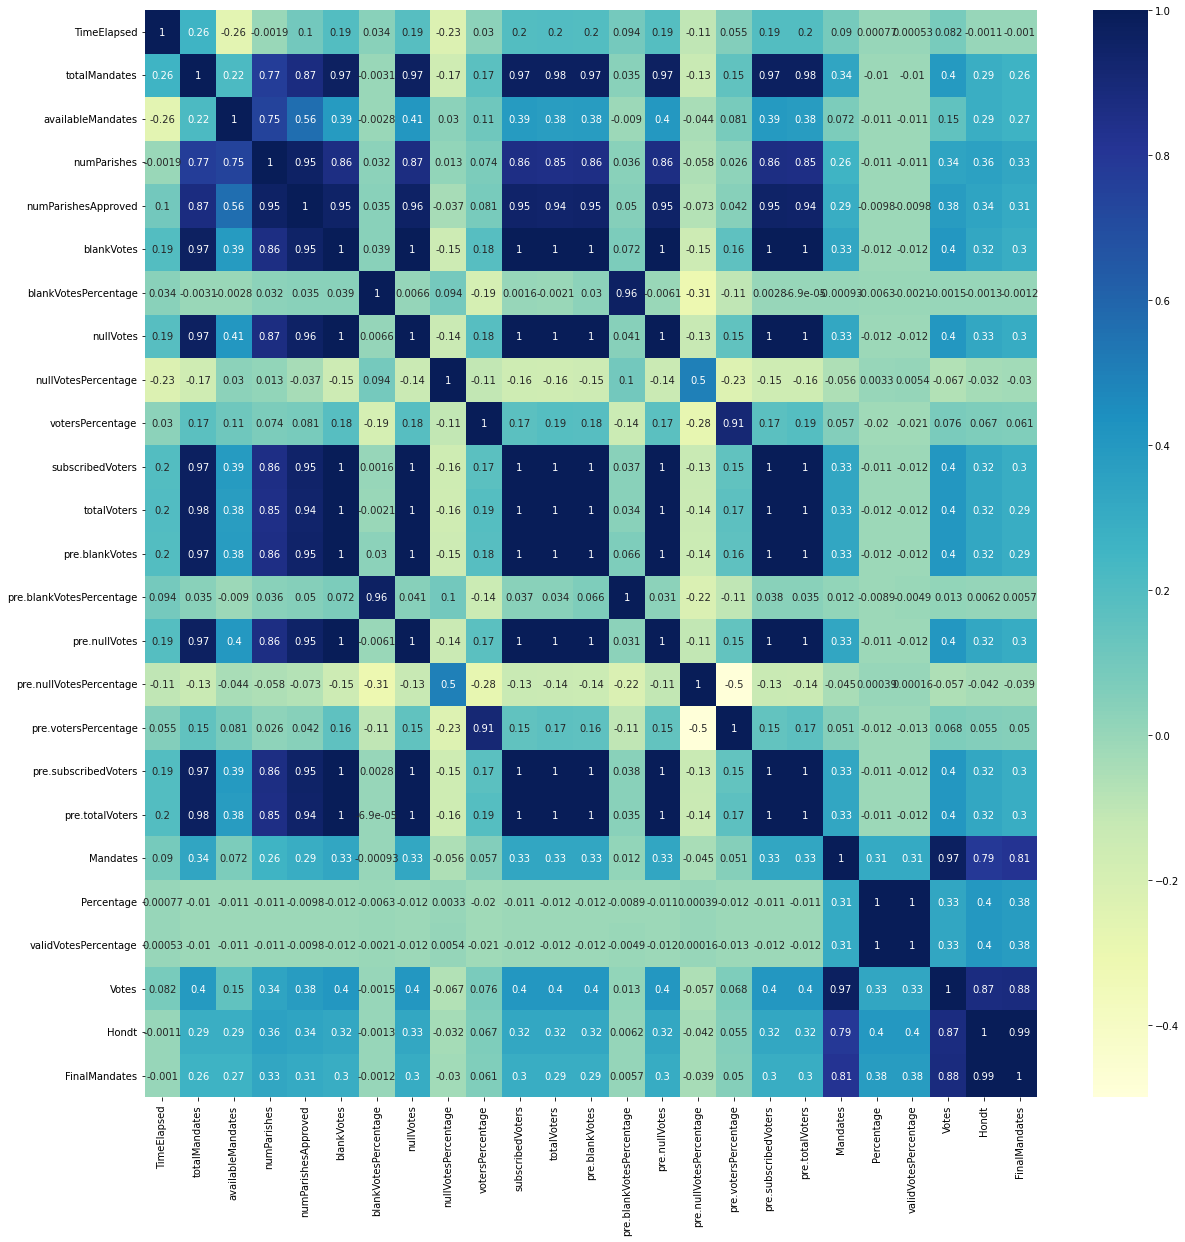

In [8]:
#plotting a correlation heatmap
plt.figure(figsize=(20,20))
heatmap = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

Acima, pode-se observar que algumas features obtiveram repetidamente uma correlação muito alta (acima de 0.9). São essas: 
- totalMandates
- numParishesApproved
- blankVotes
- nullVotes
- subscribedVoters
- totalVoters
- pre.blankVotes
- pre.nullVotes
- pre.subscribedVotes
- pre.totalVoters

Essas correlações altas significam que as features em nosso modelo podem ser simplificadas para a escolha de apenas um representante.

In [9]:
columns_list = ['totalMandates',
       'availableMandates', 'numParishes', 'numParishesApproved', 'blankVotes',
       'blankVotesPercentage', 'nullVotes', 'nullVotesPercentage',
       'votersPercentage', 'subscribedVoters', 'totalVoters', 'pre.blankVotes',
       'pre.blankVotesPercentage', 'pre.nullVotes', 'pre.nullVotesPercentage',
       'pre.votersPercentage', 'pre.subscribedVoters', 'pre.totalVoters',
       'Mandates', 'Percentage', 'validVotesPercentage', 'Votes',
       'Hondt', 'FinalMandates']

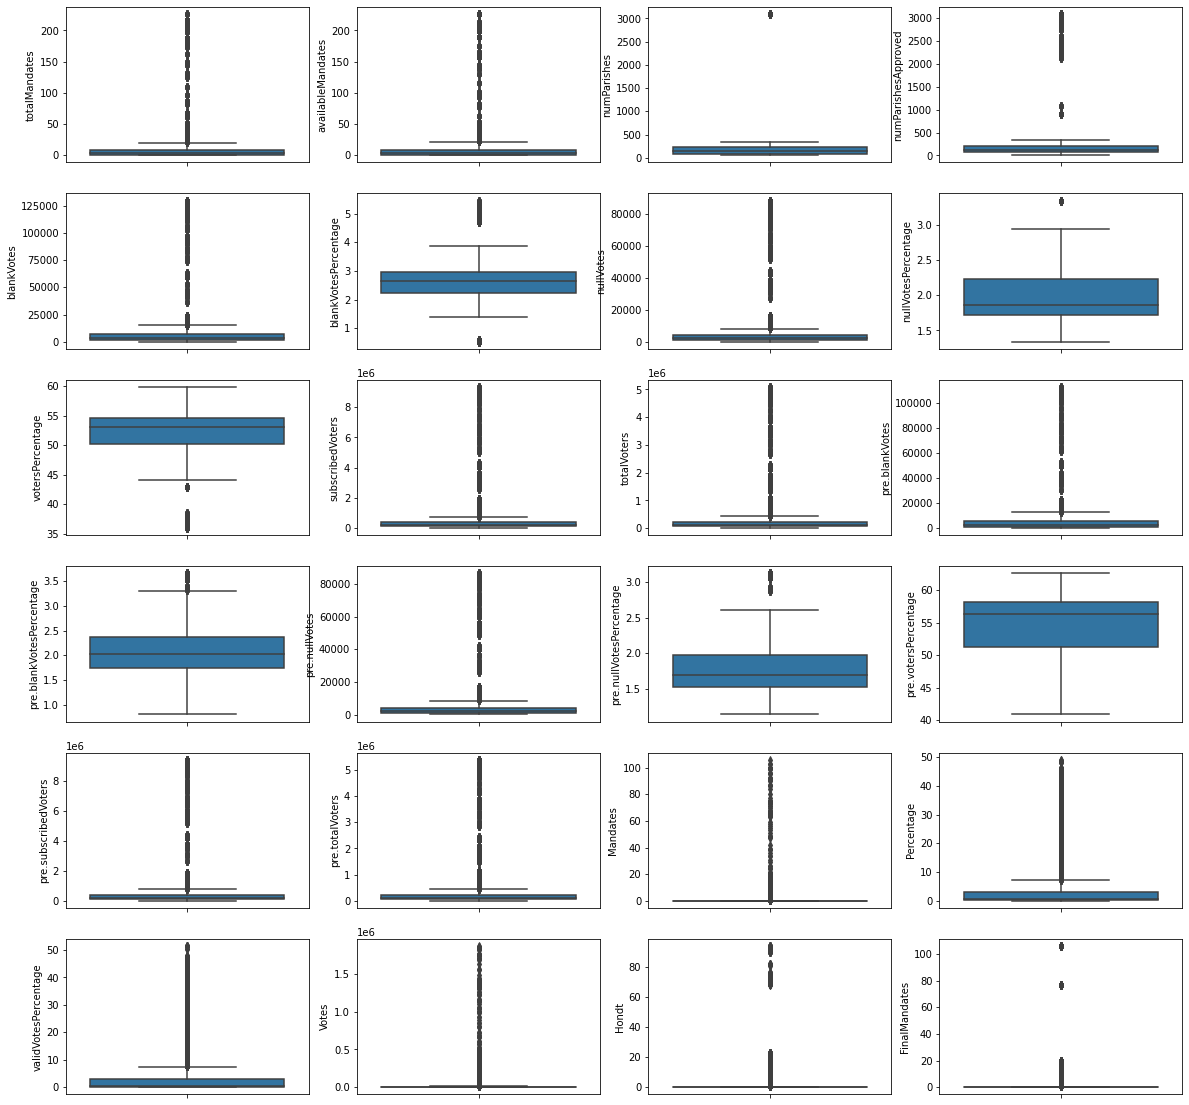

In [10]:
figure, axes = plt.subplots(int(round(len(columns_list)/4+0,499)), 4, figsize=(20,20))
for i in range(len(columns_list)):
    j = int(round(i/4 + 0,4999))
    k = i-4*(j)
    sns.boxplot(y=columns_list[i], data=df,  orient='v' , ax=axes[j, k])
figure.show()

Com isso, pode-se observar que diversas features possuem uma quantidade alta de outliers, que podem ser removidos para um melhor treino do modelo.

## Pre-processamento dos dados

### Remover colunas desnecessárias

As colunas com correlação spearmann muito alta serão removidas, pois podem ser representadas por apenas 1 feature. Neste caso serão removidos:

- blankVotes
- nullVotes
- subscribedVoters
- pre.blankVotes
- pre.nullVotes
- pre.subscribedVotes
- pre.totalVoters

Enquanto deixaremos uma única coluna as representando:
- totalVoters

Também será removida a coluna <b>time</b>, pois ela pode ser representada pela coluna TimeElapsed.

In [11]:
def drop_unwanted(df: pd.DataFrame):
    new_df = df.drop(['blankVotes', 'nullVotes', 'subscribedVoters', 'pre.blankVotes', 'pre.nullVotes', 'pre.subscribedVoters', 'pre.totalVoters', 'time'], axis=1)
    return new_df

df_cleaned = drop_unwanted(df)
df_cleaned

,TimeElapsed,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotesPercentage,nullVotesPercentage,votersPercentage,totalVoters,pre.blankVotesPercentage,pre.nullVotesPercentage,pre.votersPercentage,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
0,0,Território Nacional,0,226,3092,1081,2.50,2.30,51.36,386497,1.94,1.91,52.66,PS,0,38.29,40.22,147993,94,106
1,0,Território Nacional,0,226,3092,1081,2.50,2.30,51.36,386497,1.94,1.91,52.66,PPD/PSD,0,33.28,34.95,128624,81,77
2,0,Território Nacional,0,226,3092,1081,2.50,2.30,51.36,386497,1.94,1.91,52.66,B.E.,0,6.81,7.15,26307,16,19
3,0,Território Nacional,0,226,3092,1081,2.50,2.30,51.36,386497,1.94,1.91,52.66,CDS-PP,0,4.90,5.14,18923,12,5
4,0,Território Nacional,0,226,3092,1081,2.50,2.30,51.36,386497,1.94,1.91,52.66,PCP-PEV,0,4.59,4.83,17757,11,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21638,265,Viseu,8,0,277,277,2.81,2.08,51.04,177647,2.22,1.90,51.28,NC,0,0.19,0.20,332,0,0
21639,265,Viseu,8,0,277,277,2.81,2.08,51.04,177647,2.22,1.90,51.28,PNR,0,0.18,0.19,326,0,0
21640,265,Viseu,8,0,277,277,2.81,2.08,51.04,177647,2.22,1.90,51.28,MPT,0,0.14,0.15,256,0,0
21641,265,Viseu,8,0,277,277,2.81,2.08,51.04,177647,2.22,1.90,51.28,PTP,0,0.13,0.14,239,0,0


### Removendo Outliers

Usaremos o método Z-Score para a remoção de outliers de forma automatizada, considerando um treshold de 3.

Será utilizado o pacote Scipy.stats para o cálculo do z-score.

In [12]:
def remove_outliers(df):
    #Calculate zscore for each row and column
    z = np.abs(stats.zscore(df_cleaned.drop(['territoryName', 'Party'], axis=1)))
    
    #Remove rows with outliers
    return df[(z < 3).all(axis=1)]

df_cleaned = remove_outliers(df_cleaned)
df_cleaned

,TimeElapsed,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotesPercentage,nullVotesPercentage,votersPercentage,totalVoters,pre.blankVotesPercentage,pre.nullVotesPercentage,pre.votersPercentage,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
22,0,Aveiro,0,16,147,12,2.92,1.59,53.30,6371,1.82,1.63,54.56,PS,0,34.33,35.95,2187,7,7
23,0,Aveiro,0,16,147,12,2.92,1.59,53.30,6371,1.82,1.63,54.56,B.E.,0,7.47,7.82,476,1,2
24,0,Aveiro,0,16,147,12,2.92,1.59,53.30,6371,1.82,1.63,54.56,CDS-PP,0,6.14,6.43,391,1,1
25,0,Aveiro,0,16,147,12,2.92,1.59,53.30,6371,1.82,1.63,54.56,PCP-PEV,0,2.39,2.50,152,0,0
26,0,Aveiro,0,16,147,12,2.92,1.59,53.30,6371,1.82,1.63,54.56,PAN,0,2.04,2.14,130,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21638,265,Viseu,8,0,277,277,2.81,2.08,51.04,177647,2.22,1.90,51.28,NC,0,0.19,0.20,332,0,0
21639,265,Viseu,8,0,277,277,2.81,2.08,51.04,177647,2.22,1.90,51.28,PNR,0,0.18,0.19,326,0,0
21640,265,Viseu,8,0,277,277,2.81,2.08,51.04,177647,2.22,1.90,51.28,MPT,0,0.14,0.15,256,0,0
21641,265,Viseu,8,0,277,277,2.81,2.08,51.04,177647,2.22,1.90,51.28,PTP,0,0.13,0.14,239,0,0


In [13]:
columns_list2 = df_cleaned.drop(['territoryName', 'Party'], axis=1).columns

/home/pedro/code-repositories/elections-prediction-with-kedro/venv/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:229: UserWarning: When passing multiple axes, layout keyword is ignored.
  warnings.warn(


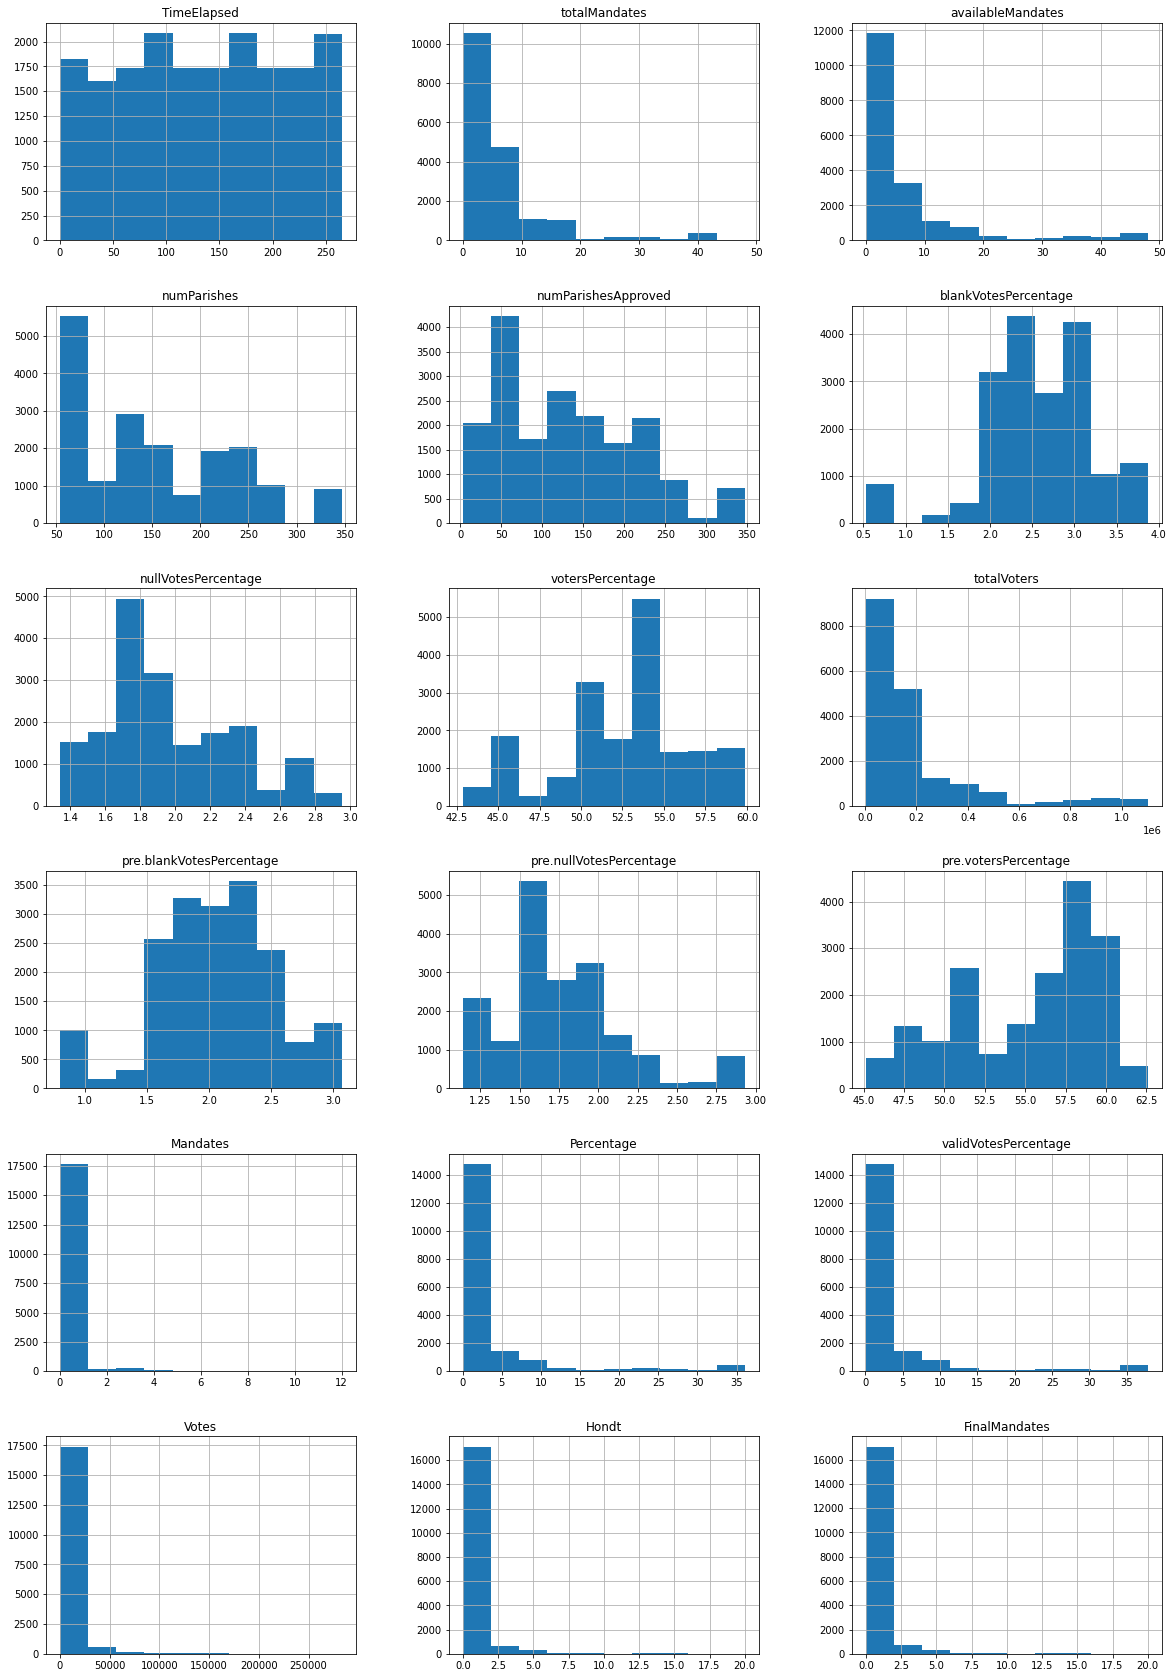

In [14]:
figure, axes = plt.subplots(int(round(len(columns_list2)/3+0,499)), 3, figsize=(20,30))

df_cleaned[columns_list2].hist(figsize=(40,8), layout=(2,11), ax=axes)

figure.show()

Pode-se observar que os boa parte das colunas possuem uma distribuição "left-skewed", como Mandates, Votes, Hondt, FinalMandates, mostrando que a distribuição é muito mais comum para valores menores.

### Inserindo o label.encoder

Para as colunas categóricas, utilizaremos o label encoder, para que esses valores consigam ser interpretados pelo modelo preditivo escolhido.

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
label_encoder_party = LabelEncoder()
label_encoder_party = label_encoder_party.fit(df_cleaned['Party'])
df_cleaned.loc[:, 'Party'] = label_encoder_party.transform(df_cleaned['Party'])


/tmp/ipykernel_12429/650274315.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.loc[:, 'Party'] = label_encoder_party.transform(df_cleaned['Party'])


In [17]:
label_encoder_territory = LabelEncoder()
label_encoder_territory = label_encoder_territory.fit(df_cleaned['territoryName'])
df_cleaned.loc[:, 'territoryName'] = label_encoder_territory.transform(df_cleaned['territoryName'])


/tmp/ipykernel_12429/3443850137.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.loc[:, 'territoryName'] = label_encoder_territory.transform(df_cleaned['territoryName'])


In [18]:
label_encoder_party.inverse_transform(df_cleaned['Party'])

array(['PS', 'B.E.', 'CDS-PP', ..., 'MPT', 'PTP', 'JPP'], dtype=object)

In [19]:
label_encoder_territory.inverse_transform(df_cleaned['territoryName'])

array(['Aveiro', 'Aveiro', 'Aveiro', ..., 'Viseu', 'Viseu', 'Viseu'],
      dtype=object)

In [20]:
def encode_label_features(df):
    #Creating and fitting label encoder for Party
    label_encoder_party = LabelEncoder()
    label_encoder_party = label_encoder_party.fit(df['Party'])
    df['Party'] = label_encoder_party.transform(df['Party'])

    #Creating and fitting label encoder for Territory
    label_encoder_territory = LabelEncoder()
    label_encoder_territory = label_encoder_territory.fit(df['territoryName'])
    df['territoryName'] = label_encoder_territory.transform(df['territoryName'])

    return df, label_encoder_party, label_encoder_territory

df_cleaned, label_encoder_party, label_encoder_territory = encode_label_features(df_cleaned)

/tmp/ipykernel_12429/535461003.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Party'] = label_encoder_party.transform(df['Party'])
/tmp/ipykernel_12429/535461003.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['territoryName'] = label_encoder_territory.transform(df['territoryName'])


In [21]:
df_cleaned

,TimeElapsed,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotesPercentage,nullVotesPercentage,votersPercentage,totalVoters,pre.blankVotesPercentage,pre.nullVotesPercentage,pre.votersPercentage,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
22,0,0,0,16,147,12,2.92,1.59,53.30,6371,1.82,1.63,54.56,17,0,34.33,35.95,2187,7,7
23,0,0,0,16,147,12,2.92,1.59,53.30,6371,1.82,1.63,54.56,1,0,7.47,7.82,476,1,2
24,0,0,0,16,147,12,2.92,1.59,53.30,6371,1.82,1.63,54.56,2,0,6.14,6.43,391,1,1
25,0,0,0,16,147,12,2.92,1.59,53.30,6371,1.82,1.63,54.56,11,0,2.39,2.50,152,0,0
26,0,0,0,16,147,12,2.92,1.59,53.30,6371,1.82,1.63,54.56,10,0,2.04,2.14,130,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21638,265,17,8,0,277,277,2.81,2.08,51.04,177647,2.22,1.90,51.28,9,0,0.19,0.20,332,0,0
21639,265,17,8,0,277,277,2.81,2.08,51.04,177647,2.22,1.90,51.28,14,0,0.18,0.19,326,0,0
21640,265,17,8,0,277,277,2.81,2.08,51.04,177647,2.22,1.90,51.28,8,0,0.14,0.15,256,0,0
21641,265,17,8,0,277,277,2.81,2.08,51.04,177647,2.22,1.90,51.28,18,0,0.13,0.14,239,0,0


## Criação do Modelo

### Dividir o dataset treino x teste

In [22]:
#Separate X and y
def split_feature_target(df):
    '''Separates X and y (features and target) sets'''

    X = df.drop('FinalMandates', axis=1)
    y = df['FinalMandates']
    
    return X, y

X, y = split_feature_target(df_cleaned)

In [23]:
from sklearn.model_selection import train_test_split
#Split train and test

def split_train_test(X, y):
    '''Split features and target into train and test sets'''
    
    X_train, X_test, y_train, y_test = 
        train_test_split(
            X, 
            y, 
            test_size=0.3, 
            random_state=9999, 
            stratify=y
        )
        
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = split_train_test(X, y)

In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

def fit_model(X_train, X_test, y_train, y_test):
    """Fits RandomForestRegressor Classifier using a training dataset"""
    
    classifier = RandomForestRegressor(max_depth=10, random_state=9999)
    classifier.fit(X_train, y_train)
    
    #Predicts the test dataset to get performance measures
    y_pred = classifier.predict(X_test)
    
        # R2 Score
    r2 = float(format(r2_score(y_test, y_pred), '.5f'))
    print("\nR2 score: ", r2)
    
        #Calculate RMSE (Root Mean Square Error)
    rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
    print("\nRMSE: ", rmse)
    
    return classifier

fit_model(X_train, X_test, y_train, y_test)


R2 score:  0.99961

RMSE:  0.028


RandomForestRegressor(max_depth=10, random_state=9999)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(max_depth=10, random_state=9999)
regr.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Predicting the target values of the test set
y_pred = regr.predict(X_test)

# RMSE (Root Mean Square Error)
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
print("\nRMSE: ", rmse)

# R2 Score
r2_score = float(format(r2_score(y_test, y_pred), '.5f'))
print("\nR2 score: ", r2_score)